In [2]:
import time
from coffea import hist, nanoevents, util
import coffea.processor as processor
import awkward as ak
import numpy as np
import glob as glob
import re
import itertools
# import vector as vec
from coffea.nanoevents.methods import vector, candidate
from coffea.nanoevents import NanoAODSchema, BaseSchema
from coffea.lumi_tools import LumiMask
# for applying JECs
from coffea.lookup_tools import extractor
from coffea.jetmet_tools import FactorizedJetCorrector, JetCorrectionUncertainty
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory
from coffea.jetmet_tools import JetResolution, JetResolutionScaleFactor
# from jmeCorrections import JetMetCorrections
import json


import coffea.processor as processor
from coffea import hist
from coffea.analysis_tools import PackedSelection, Weights
from coffea.nanoevents import NanoAODSchema, NanoEventsFactory
from coffea.nanoevents.methods import nanoaod

# NanoAODSchema.warn_missing_crossrefs = False

import pickle
# np.errstate(invalid='ignore', divide='ignore')



import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
from coffea.util import load, save
#hists = load('/cms/scratch/sdogra/mtop/rishabh/decaf/analysis/hists/UL_had_fourth_2018.scaled')
hists = load('/cms/scratch/sdogra/mtop/rishabh/decaf/analysis/hists/UL_had_test_2018.scaled')

data_hists = hists['data']
bkg_hists = hists['bkg']
sig_hists = hists['sig']

In [57]:
bkg_hists

{'template': <Hist (process,region,systematic,recoil) instance at 0x7efffcdcfef0>,
 'ele_phi': <Hist (process,region,ele_phi) instance at 0x7efffd439a90>,
 'sumw': <Hist (process,sumw) instance at 0x7efffd4350f0>,
 'j1pt': <Hist (process,region,j1pt) instance at 0x7efffd435b38>,
 'metphi': <Hist (process,region,metphi) instance at 0x7efffd5f6588>,
 'ndflvM': <Hist (process,region,ndflvM) instance at 0x7efffcf23940>,
 'dr_mu_lj': <Hist (process,region,dr_mu_lj) instance at 0x7efffcd9cc50>,
 'ele_pT': <Hist (process,region,ele_pT) instance at 0x7efffcd8cfd0>,
 'mu_eta': <Hist (process,region,mu_eta) instance at 0x7efffd271cf8>,
 'TvsQCD': <Hist (process,region,TvsQCD) instance at 0x7efffce23160>,
 'j1phi': <Hist (process,region,j1phi) instance at 0x7efffd1a4c50>,
 'nfatjets': <Hist (process,region,nfatjets) instance at 0x7efffd187390>,
 'recoil': <Hist (process,region,recoil) instance at 0x7efffd19ea90>,
 'cutflow': <Hist (process,region,cut) instance at 0x7efffd666278>,
 'ndflvL': <Hist

In [58]:
sig_hists

{'template': <Hist (process,region,systematic,recoil) instance at 0x7efffc9cc8d0>,
 'ele_phi': <Hist (process,region,ele_phi) instance at 0x7efffc9ccc18>,
 'sumw': <Hist (process,sumw) instance at 0x7efffc9ccda0>,
 'j1pt': <Hist (process,region,j1pt) instance at 0x7efffc9ccf60>,
 'metphi': <Hist (process,region,metphi) instance at 0x7efffc9eb128>,
 'ndflvM': <Hist (process,region,ndflvM) instance at 0x7efffc9eb2b0>,
 'dr_mu_lj': <Hist (process,region,dr_mu_lj) instance at 0x7efffc9eb438>,
 'ele_pT': <Hist (process,region,ele_pT) instance at 0x7efffc9eb5c0>,
 'mu_eta': <Hist (process,region,mu_eta) instance at 0x7efffc9eb748>,
 'TvsQCD': <Hist (process,region,TvsQCD) instance at 0x7efffc9eb8d0>,
 'j1phi': <Hist (process,region,j1phi) instance at 0x7efffc9eba58>,
 'nfatjets': <Hist (process,region,nfatjets) instance at 0x7efffc9ebbe0>,
 'recoil': <Hist (process,region,recoil) instance at 0x7efffc9ebd68>,
 'cutflow': <Hist (process,region,cut) instance at 0x7efffc9ebef0>,
 'ndflvL': <Hist

In [59]:
data_hists['TvsQCD'].integrate('region', 'tecr').values()

{('EGamma',): array([25.,  3.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.])}

In [65]:
vari = 'fj1pt'
region = 'tmcr'

In [66]:
bkg_hists[vari].integrate('region',region).values()

{('DY+HF',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 ('DY+LF',): array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 ('W+HF',): array([    0.        ,     0.        ,     0.        ,     0.        ,
        -2925.92900634,  2955.50232828,  3212.53774646,  3781.28038367,
        -2495.66945192,  7431.18721084, -6042.96445891,     0.        ,
         2180.29402751,  2830.48413762,  2924.14448437,  9469.02513628,
            0.        ,  3485.25387796,     0.        ,     0.        ,
            0.        ,  3240.43538318,     0.        ,     0.        ,
            0.        ,     0.        ,     0.        ,     0.        ]),
 ('W+LF',): array([    0.        ,     0.        ,     0.        ,     0.        ,
        -2599.04821147,  3051.6643391 ,  3125.88964016,  6823.00591891,
        -8905.32316224,  8538.04397963,  469

In [67]:
bkg_hists[vari].identifiers('process')

[<StringBin (DY+HF) instance at 0x7efffd4f2198>,
 <StringBin (DY+LF) instance at 0x7efffd42b1d0>,
 <StringBin (W+HF) instance at 0x7efffd43a550>,
 <StringBin (W+LF) instance at 0x7efffd43a5f8>,
 <StringBin (QCD) instance at 0x7efffd43aac8>]

In [68]:
bkg_hists[vari].integrate('process').integrate('region',region).values()

{(): array([     0.        ,      0.        ,      0.        ,      0.        ,
         -5524.9772178 ,   6007.16666738,   6338.42738662,  10604.28630258,
        -11400.99261415,  15969.23119047,  -1348.22224623,   6688.91236758,
         -2635.47798971,   7738.54999122,    772.44173034,  12683.81888453,
             0.        ,   7264.11590595,   5436.26000395,      0.        ,
             0.        ,   3240.43538318,      0.        ,      0.        ,
             0.        ,      0.        ,      0.        ,      0.        ])}

<AxesSubplot:xlabel='AK15 Leading Jet Pt', ylabel='Events'>

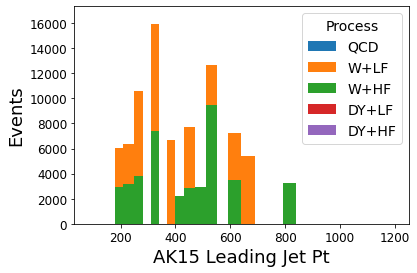

In [69]:
from coffea.hist import plot

plot.plot1d(bkg_hists[vari].integrate('region',region), stack=True)


<AxesSubplot:xlabel='AK15 Leading Jet Pt', ylabel='Events'>

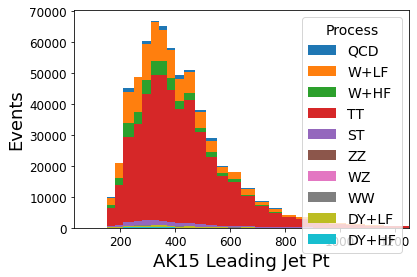

In [19]:
from coffea.hist import plot

plot.plot1d(bkg_hists[vari].integrate('region',region), stack=True)


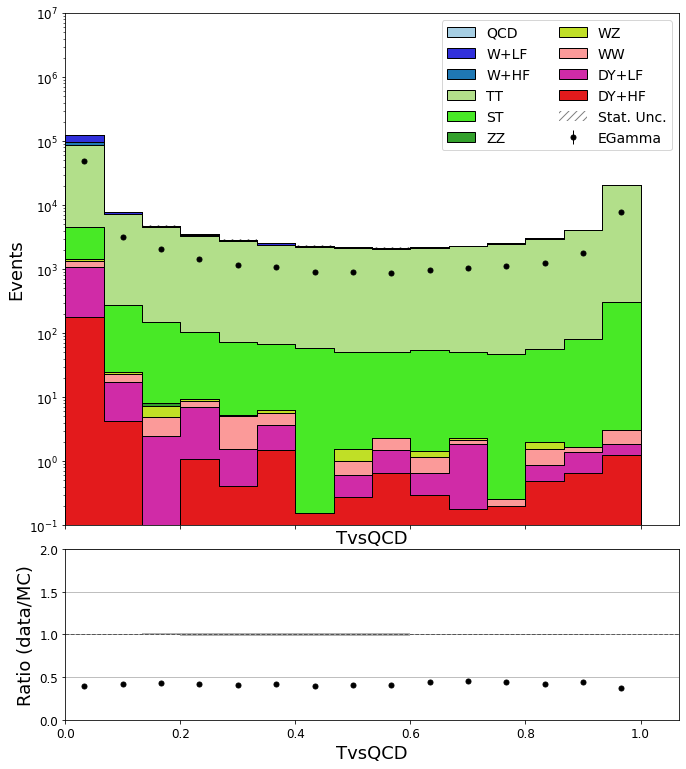

In [41]:
from cycler import cycler
vari = 'TvsQCD'
region = 'tecr'
data = 'EGamma' #'MET' 

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
          '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
          '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']
fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
fig.subplots_adjust(hspace=.07)
ax.set_prop_cycle(cycler(color=colors))

plot.plot1d(data_hists[vari].integrate('region', region),#[data[year][str(j)]],
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            error_opts=data_err_opts
           )

plot.plot1d(bkg_hists[vari].integrate('region', region),
            overlay="process",
            ax=ax,
            overflow='over',
            clear=False,
            stack=True,
            fill_opts=fill_opts,
            error_opts=error_opts
           )

plot.plotratio(data_hists[vari].integrate('region', region).integrate('process', data),
               bkg_hists[vari].integrate('region', region).sum('process'),
               ax=rax,
               overflow='over',
               error_opts=data_err_opts,
               denom_fill_opts={},
               guide_opts={},
               unc='num'
              )

rax.set_ylabel('Ratio (data/MC)')
rax.set_ylim(0.0,2.0)
rax.grid(axis='y')

ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
args = {'linestyle':'--', 'linewidth': 5}
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
ax.set_ylim(.1, 10000000)
#ax.set_xlim(0, 1500)
leg = ax.legend(ncol=2, loc='best')

In [60]:
sig_hists[vari].identifiers('region')

[]

In [61]:
for region in sig_hists[vari].identifiers('region'):
    print(region)
sig_hists[vari].integrate('process').integrate('region','sr').values()

{}

KeyError: ()

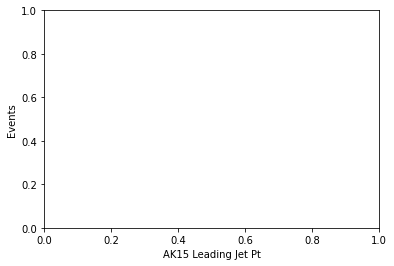

In [62]:
plot.plot1d(sig_hists[vari].integrate('process').integrate('region','sr'), stack=True)


In [63]:
data_hists[vari].identifiers('process')

[<StringBin (MET) instance at 0x7f7b6087b400>,
 <StringBin (EGamma) instance at 0x7f7b6087b518>]

In [64]:
data_hists[vari].integrate('region',region).values()

{('EGamma',): array([   0.,    0.,    0.,    0., 1427., 2954., 6198., 6530., 7829.,
        8294., 7627., 6752., 5607., 5830., 4318., 3156., 2375., 2008.,
        1345.,  916.,  613.,  488.,  375.,  266.,  187.,  115.,   98.,
          67.])}

<AxesSubplot:xlabel='AK15 Leading Jet Pt', ylabel='Events'>

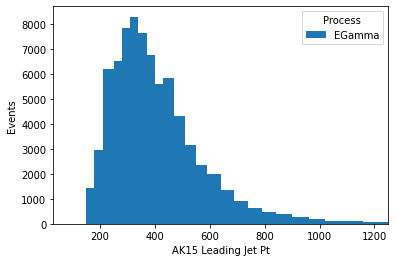

In [65]:
plot.plot1d(data_hists[vari].integrate('region',region), stack=True)
